# Supervised Techniques : Classification

In this project I've used different classification algorithms on iris dataset from sklearn.datasets and evaluated accuracy computed by each model.

In [9]:
# Import all models that will be used to make classification.

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics

In [28]:
from sklearn.datasets import load_iris
iris= load_iris()
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [12]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [13]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [31]:
df= pd.DataFrame(iris.data, columns= iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [45]:
# Clean column names.
df.rename(columns={'sepal length (cm)': 'sepal_length','sepal width (cm)':'sepal width','petal length (cm)':'petal length','petal width (cm)':'petal width'}, inplace= True)

In [47]:
df.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [51]:
df['target']= iris.target
df.tail()

,sepal length,sepal width,petal length,petal width,target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [49]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [55]:
# Created new column 'flower_name' by using target_names.
df['flower_name']= df.target.apply( lambda x: iris.target_names[x])
df.head()
df.tail()

,sepal length,sepal width,petal length,petal width,target,flower_name
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


In [56]:
# Remove target col and str col.
X= df.drop(['target','flower_name'], axis=1)
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [57]:
y= df.target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

Split model into train and test

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state=10)

### Logistic Regresson


In [99]:
model_lr= LogisticRegression()

In [100]:
model_lr.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [101]:
predictions= model_lr.predict(X_test)

In [102]:
print('Accuracy of Logistic Regression model is:', metrics.accuracy_score(y_test, predictions))

Accuracy of Logistic Regression model is: 1.0


In [138]:
cm= metrics.confusion_matrix(y_test, predictions)
cm

array([[14,  0,  0],
       [ 0, 17,  0],
       [ 0,  0, 14]])

Text(33.0, 0.5, 'Truth')

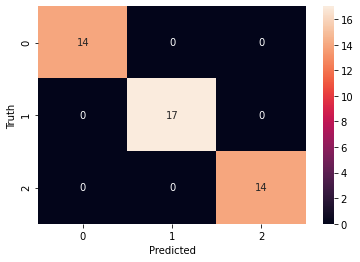

In [104]:
import seaborn as sns
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Decision Tree

In [105]:
model_dt= DecisionTreeClassifier( min_samples_leaf= 2, min_samples_split= 13)

In [106]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=13)

In [107]:
predictions_dt= model_dt.predict(X_test)

In [141]:
print('Accuracy of Decision Tree is:', metrics.accuracy_score(y_test, predictions_dt))

Accuracy of Decision Tree is: 0.9777777777777777


In [142]:
cm_dt= metrics.confusion_matrix(y_test, predictions_dt)
cm_dt

array([[14,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 13]])

Text(33.0, 0.5, 'Truth')

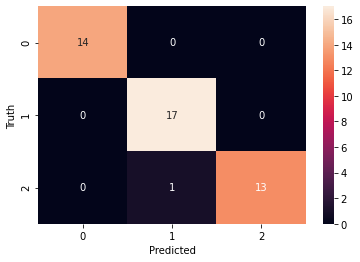

In [143]:
import seaborn as sns
sns.heatmap(cm_dt, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Support Vector Machine

In [116]:
model_svc= SVC(kernel= 'linear')

In [120]:
model_svc.fit(X_train, y_train)

SVC(kernel='linear')

In [121]:
predictions_svc= model_svc.predict(X_test)

In [122]:
print('Accuracy of Support Vector Machine is:', metrics.accuracy_score(y_test, predictions_svc))

Accuracy of Support Vector Machine model is: 1.0


### RandomForestClassifier

In [134]:
model_rf= RandomForestClassifier(n_estimators= 15, min_samples_leaf= 2, min_samples_split= 13)

In [135]:
model_rf.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=13,
                       n_estimators=15)

In [136]:
predictions_rf= model_rf.predict(X_test)

In [137]:
print('Accuracy of Random Forest is:', metrics.accuracy_score(y_test, predictions_rf))

Accuracy of Random Forest is: 1.0


Many of the classification models resulted in high accuracy for our dataset.